In [720]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

### Note on what preprocessing will be done
1) Remove columns that are not relevant to our analysis
2) Create new columns for a more specific analysis
3) Identify unique levels of categorical variables
4) Check for duplicates
5) Check for outliers
6) Handle missing values

### Examine the original data

In [721]:
landslide = pd.read_csv("../data/Global_Landslide.csv")
landslide.head()

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [722]:
print("Number of observations in the data:", landslide.shape[0])
print("Number of columns:", landslide.shape[1])

Number of observations in the data: 11033
Number of columns: 31


In [723]:
landslide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count             9648 non-null   flo

In [724]:
landslide.describe()

,event_id,event_time,fatality_count,injury_count,event_import_id,admin_division_population,gazeteer_distance,longitude,latitude
count,11033.000000,0.0,9648.000000,5359.000000,9471.000000,9.471000e+03,9471.000000,11033.000000,11033.000000
mean,5598.953141,NaN,3.219424,0.751819,4798.563070,1.577600e+05,11.873689,2.520441,25.881887
std,3249.228647,NaN,59.886178,8.458955,2789.125559,8.297345e+05,15.598228,100.908393,20.415054
min,1.000000,NaN,0.000000,0.000000,-111.167300,0.000000e+00,0.000030,-179.980766,-46.774800
25%,2785.000000,NaN,0.000000,0.000000,2386.500000,1.963000e+03,2.363845,-107.871700,13.917600
50%,5563.000000,NaN,0.000000,0.000000,4773.000000,7.365000e+03,6.254870,19.694600,30.534500
75%,8435.000000,NaN,1.000000,0.000000,7189.500000,3.402100e+04,15.815610,93.948000,40.866259
max,11221.000000,NaN,5000.000000,374.000000,9669.000000,1.269184e+07,215.448880,179.991364,72.627500


### Remove unwanted columns from the dataset

In [725]:
# Select columns to remove
remove_cols = ["source_name",
               "source_link",
               "event_title",
               "event_description",
               "location_description",
               "location_accuracy",
               "storm_name",
               "photo_link",
               "notes",
               "event_import_source",
               "event_import_id",
               "submitted_date",
               "created_date",
               "last_edited_date"]

# Create a new dataframe excluding removed columns
landslideCleaned = landslide.drop(remove_cols, axis = 1)

### Create new columns

One area of interest is the time at which landslides have occurred, therefore we will create new columns such as ‘event_year’, ‘event_month’, and ‘event_hour’ that will allow us to conduct a more specific analysis rather than simply analyzing annual occurrences for example.

In [726]:
# Change 'event_date' column from String to Date format
landslideCleaned['event_date'] = pd.to_datetime(landslideCleaned['event_date'])

# Create a 'year' column by extracting the year from the 'event_date' column
landslideCleaned.insert(landslideCleaned.columns.get_loc('event_date') + 1, 'event_year', landslideCleaned['event_date'].dt.year)

# Create a 'month' column by extracting the month from the 'event_date' column,
# then convert the month to its string representation
landslideCleaned.insert(landslideCleaned.columns.get_loc('event_year') + 1, 'event_month', landslideCleaned['event_date'].dt.month)
landslideCleaned['event_month'] = landslideCleaned['event_month'].case_when(
    [
        (landslideCleaned['event_month'] == 1, 'January'),
        (landslideCleaned['event_month'] == 2, 'February'),
        (landslideCleaned['event_month'] == 3, 'March'),
        (landslideCleaned['event_month'] == 4, 'April'),
        (landslideCleaned['event_month'] == 5, 'May'),
        (landslideCleaned['event_month'] == 6, 'June'),
        (landslideCleaned['event_month'] == 7, 'July'),
        (landslideCleaned['event_month'] == 8, 'August'),
        (landslideCleaned['event_month'] == 9, 'September'),
        (landslideCleaned['event_month'] == 10, 'October'),
        (landslideCleaned['event_month'] == 11, 'November'),
        (landslideCleaned['event_month'] == 12, 'December'),
    ]
)

# Create a 'time' column by extracting the time from the 'event_date' column
landslideCleaned['event_time'] = landslideCleaned['event_date'].dt.time

# Create an 'hour' column by extracting the hour from the 'event_date' column
landslideCleaned.insert(landslideCleaned.columns.get_loc('event_time') + 1, 'event_hour', landslideCleaned['event_date'].dt.hour)

# Create an 'event_am_pm' column using the 'hour' column
landslideCleaned.insert(landslideCleaned.columns.get_loc('event_hour') + 1, 'event_am_pm', np.where(landslideCleaned['event_hour'] >= 12, 'PM', 'AM'))

/var/folders/ln/2fwtm4_n7l50966q96qbn52r0000gn/T/ipykernel_6356/2371365108.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  landslideCleaned['event_date'] = pd.to_datetime(landslideCleaned['event_date'])


In [727]:
landslideCleaned.head()

,event_id,event_date,event_year,event_month,event_time,event_hour,event_am_pm,landslide_category,landslide_trigger,landslide_size,...,fatality_count,injury_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude
0,684,2008-08-01 00:00:00,2008,August,00:00:00,0,AM,landslide,rain,large,...,11.0,NaN,China,CN,Shaanxi,0.0,Jingyang,41.02145,107.4500,32.5625
1,956,2009-01-02 02:00:00,2009,January,02:00:00,2,AM,mudslide,downpour,small,...,0.0,NaN,United States,US,Oregon,36619.0,Lake Oswego,0.60342,-122.6630,45.4200
2,973,2007-01-19 00:00:00,2007,January,00:00:00,0,AM,landslide,downpour,large,...,10.0,NaN,Peru,PE,Junín,14708.0,San Ramón,0.85548,-75.3587,-11.1295
3,1067,2009-07-31 00:00:00,2009,July,00:00:00,0,AM,landslide,monsoon,medium,...,1.0,NaN,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,81.7080,28.8378
4,2603,2010-10-16 12:00:00,2010,October,12:00:00,12,PM,landslide,tropical_cyclone,medium,...,0.0,NaN,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,123.8978,10.3336


In [728]:
landslideCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   event_id                   11033 non-null  int64         
 1   event_date                 11033 non-null  datetime64[ns]
 2   event_year                 11033 non-null  int32         
 3   event_month                11033 non-null  object        
 4   event_time                 11033 non-null  object        
 5   event_hour                 11033 non-null  int32         
 6   event_am_pm                11033 non-null  object        
 7   landslide_category         11032 non-null  object        
 8   landslide_trigger          11010 non-null  object        
 9   landslide_size             11024 non-null  object        
 10  landslide_setting          10964 non-null  object        
 11  fatality_count             9648 non-null   float64       
 12  inju

In [729]:
print("Number of observations in the data:", landslideCleaned.shape[0])
print("Number of columns:", landslideCleaned.shape[1])

Number of observations in the data: 11033
Number of columns: 21


### Duplicate check

In [730]:
landslideCleaned[landslideCleaned.duplicated()]

,event_id,event_date,event_year,event_month,event_time,event_hour,event_am_pm,landslide_category,landslide_trigger,landslide_size,...,fatality_count,injury_count,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,longitude,latitude


### Identify unique levels of categorical columns

In [731]:
for column in landslideCleaned.select_dtypes(include = ['object', 'category']).columns:
    if column == 'event_date' or column == 'event_time': continue
    print(f"{column}: {landslideCleaned[column].unique()}\n")

event_month: ['August' 'January' 'July' 'October' 'February' 'March' 'September'
 'November' 'December' 'April' 'May' 'June']

event_am_pm: ['AM' 'PM']

landslide_category: ['landslide' 'mudslide' 'complex' 'rock_fall' 'debris_flow'
 'riverbank_collapse' 'other' 'unknown' 'lahar' 'snow_avalanche' 'creep'
 'earth_flow' 'translational_slide' nan 'topple']

landslide_trigger: ['rain' 'downpour' 'monsoon' 'tropical_cyclone' 'unknown'
 'continuous_rain' 'dam_embankment_collapse' 'no_apparent_trigger' nan
 'other' 'leaking_pipe' 'construction' 'snowfall_snowmelt' 'mining'
 'flooding' 'earthquake' 'freeze_thaw' 'volcano' 'vibration']

landslide_size: ['large' 'small' 'medium' 'unknown' 'very_large' nan 'catastrophic']

landslide_setting: ['mine' 'unknown' 'above_road' 'urban' 'natural_slope' nan
 'engineered_slope' 'below_road' 'above_river' 'retaining_wall' 'other'
 'above_coast' 'bluff' 'burned_area' 'deforested_slope']

country_name: ['China' 'United States' 'Peru' 'Nepal' 'Philippines' 'M

### Check for missing values

In [732]:
print(landslideCleaned.isnull().sum())

event_id                        0
event_date                      0
event_year                      0
event_month                     0
event_time                      0
event_hour                      0
event_am_pm                     0
landslide_category              1
landslide_trigger              23
landslide_size                  9
landslide_setting              69
fatality_count               1385
injury_count                 5674
country_name                 1562
country_code                 1564
admin_division_name          1637
admin_division_population    1562
gazeteer_closest_point       1563
gazeteer_distance            1562
longitude                       0
latitude                        0
dtype: int64


In [733]:
# Create a list of the columns whose missing values will be filled with 'unknown'
fillColumns = ['landslide_category',    # the first four columns already have 'unknown' values, so we will include the NA values in the 'unknown'
               'landslide_trigger',
               'landslide_size',
               'landslide_setting',
               'country_name',          # the last four columns will be imputed as 'unknown' values, then when analysis is done
               'country_code',          # focusing on these columns, these 'unknown' values will be filtered out
               'admin_division_name',
               'gazeteer_closest_point']

# Fill the missing values with 'unknown'
landslideCleaned[fillColumns] = landslideCleaned[fillColumns].fillna('unknown')

# Create a list of the columns whose missing values will be imputed as -1
fillColumns = ['admin_division_population',
               'gazeteer_distance']

# Fill the missing values with -1
landslideCleaned[fillColumns] = landslideCleaned[fillColumns].fillna(-1)

In [734]:
# Drop the observations with missing values for 'fatality_count' and 'injury_count'
landslideCleaned = landslideCleaned.dropna(subset = ['fatality_count', 'injury_count'])

In [735]:
print("Number of observations in the data:", landslideCleaned.shape[0])
print("Number of columns:", landslideCleaned.shape[1])

Number of observations in the data: 5351
Number of columns: 21


In [736]:
print(landslideCleaned.isnull().sum())

event_id                     0
event_date                   0
event_year                   0
event_month                  0
event_time                   0
event_hour                   0
event_am_pm                  0
landslide_category           0
landslide_trigger            0
landslide_size               0
landslide_setting            0
fatality_count               0
injury_count                 0
country_name                 0
country_code                 0
admin_division_name          0
admin_division_population    0
gazeteer_closest_point       0
gazeteer_distance            0
longitude                    0
latitude                     0
dtype: int64


To handle the missing values, we first filled the missing values of eight columns with ‘unknown’. Four of these eight columns already had an ‘unknown’ value in them, so we included the NA values with the ‘unknown’. The other four columns did not have an ‘unknown’ value, however we want to keep these observations as they still contain useful information in the ‘fatality_count’ and ‘injury_count’ columns, but when doing an analysis where these columns are the focal point we will simply filter out the unknown values. Doing the same for the two numeric columns with missing values, we imputed a value of -1 to the ‘admin_division_population’ and ‘gazeteer_distance’ columns allowing us to still use the information from the other columns of these observations yet maintaining the ability to filter out these values when necessary.  

### Check for outliers

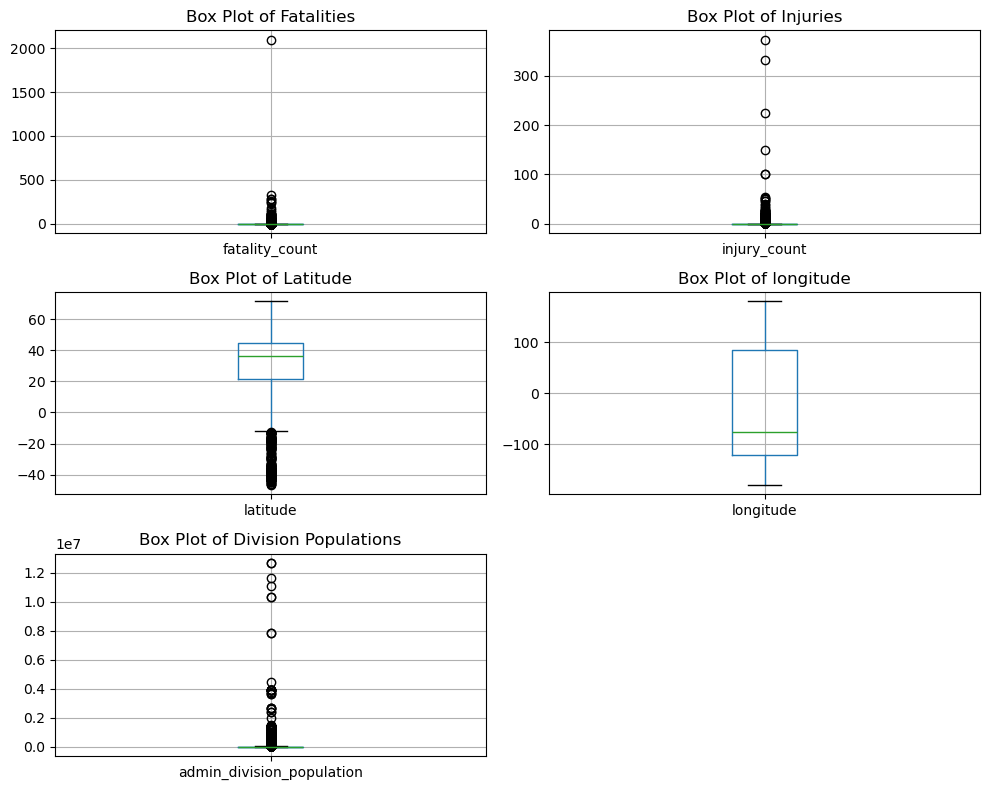

In [737]:
fig, axes = plt.subplots(3, 2, figsize = (10, 8))
landslideCleaned[['fatality_count']].boxplot(ax = axes[0,0])
axes[0,0].set_title("Box Plot of Fatalities")

landslideCleaned[['injury_count']].boxplot(ax = axes[0,1])
axes[0,1].set_title("Box Plot of Injuries")

landslideCleaned[['latitude']].boxplot(ax = axes[1,0])
axes[1,0].set_title("Box Plot of Latitude")

landslideCleaned[['longitude']].boxplot(ax = axes[1,1])
axes[1,1].set_title("Box Plot of longitude")

landslideCleaned[['admin_division_population']].boxplot(ax = axes[2,0])
axes[2,0].set_title("Box Plot of Division Populations")

axes[2,1].axis('off')

plt.tight_layout()
plt.show()

In [738]:
outlierColumns = ['fatality_count', 'injury_count', 'admin_division_population', 'latitude', 'longitude']
for column in outlierColumns: 
    q25 = landslideCleaned[column].quantile(0.25)
    q75 = landslideCleaned[column].quantile(0.75)
    iqr = q75 - q25
    lowerBound = q25 - 1.5 * iqr
    upperBound = q75 + 1.5 * iqr
    outliers = landslideCleaned[(landslideCleaned[column] < lowerBound) | (landslideCleaned[column] > upperBound)]
    print(f"{column}: {outliers.shape[0]} outliers")

fatality_count: 980 outliers
injury_count: 568 outliers
admin_division_population: 799 outliers
latitude: 178 outliers
longitude: 0 outliers


Making some early assumptions based off intuition, it seems as though the outliers in the fatality_count column are likely a result of most landslide occurrences having low fatality counts, therefore the occurrences that do have high fatality counts will appear as outliers. Similar reasoning can be used for the injury_count column, and this is something that we can further investigate in the EDA process and later steps of the project. 

The outliers in the admin_division_population column could be a result of most landslides occurring in rural areas, therefore when landslides do occur closer to cities or more heavily populated areas these occurrences will appear as outliers. This is also something that we can further investigate. 

The boxplot of the latitude column indicates that the majority of landslides occur within the latitudinal boundaries of 15<sup>o</sup>N and 40<sup>o</sup>N which include the southern parts of Asia, the northern parts of Africa, along with the majority of the United States and Mexico. This implies that landslides occurring in Australia, South America, and southern parts of Africa are considered outliers. 

### Remove Outliers

In [739]:
'''
outlierColumns = ['fatality_count', 'injury_count', 'admin_division_population']

for column in outlierColumns: 
    q25 = landslideCleaned[column].quantile(0.25)
    q75 = landslideCleaned[column].quantile(0.75)
    iqr = q75 - q25
    lowerBound = q25 - 1.5 * iqr
    upperBound = q75 + 1.5 * iqr
    landslideCleaned = landslideCleaned[(landslideCleaned[column] >= lowerBound) & (landslideCleaned[column] <= upperBound)]
    outliers = landslideCleaned[(landslideCleaned[column] < lowerBound) | (landslideCleaned[column] > upperBound)]
    print(f"{column}: {outliers.shape[0]} outliers")
'''

'\noutlierColumns = [\'fatality_count\', \'injury_count\', \'admin_division_population\']\n\nfor column in outlierColumns: \n    q25 = landslideCleaned[column].quantile(0.25)\n    q75 = landslideCleaned[column].quantile(0.75)\n    iqr = q75 - q25\n    lowerBound = q25 - 1.5 * iqr\n    upperBound = q75 + 1.5 * iqr\n    landslideCleaned = landslideCleaned[(landslideCleaned[column] >= lowerBound) & (landslideCleaned[column] <= upperBound)]\n    outliers = landslideCleaned[(landslideCleaned[column] < lowerBound) | (landslideCleaned[column] > upperBound)]\n    print(f"{column}: {outliers.shape[0]} outliers")\n'